Score over time: 0.029
Final Q-Table Values
[[0.         0.         0.         0.        ]
 [0.         0.         0.94148015 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.93206535 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.82616862 0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         0.         0.        ]]


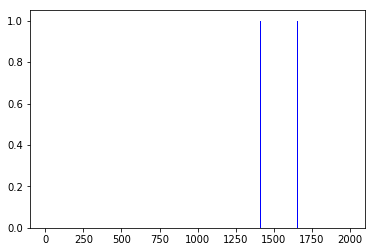

In [2]:
# https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0#.pjz9g59ap

import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


env = gym.make('FrozenLake-v0')

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
learning_rate = .85
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1,
                                                         env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        state = new_state

        rAll += reward

    rList.append(rAll)

print("Score over time: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()


# 결과가 처참하다..
# Stochastic 환경에서는 Q를 완전히 믿으면 이렇게된다.
# 그러니.. 나를 더 믿고 Q의 의견은 참고만하자!